# Capítulo 3

## Secão 3.1
Nesta seção, se introduz o conceito de redes neurais utilizando mecânica estatística. 

### Subseção 3.1.1

Em um primeiro exemplo de rede com somente dois *labels* de classificação e aprendizado supervisionado, a função de 'chute' $Q_J$ se constrói por meio da distribuição de Boltzmann e com o uso de um hamiltoniano escrito na forma $H_{J,x}(d) = -(xJ_x+yJ_y+J)d$. Temos:

$Q_j(d|x) = \frac{e^{(xJ_x+yJ_y+J)d}}{1+e^{xJ_x+yJ_y+J}}$

onde as constantes $J$ são os parâmetros, que chamamos de *constantes de acoplamento*. 

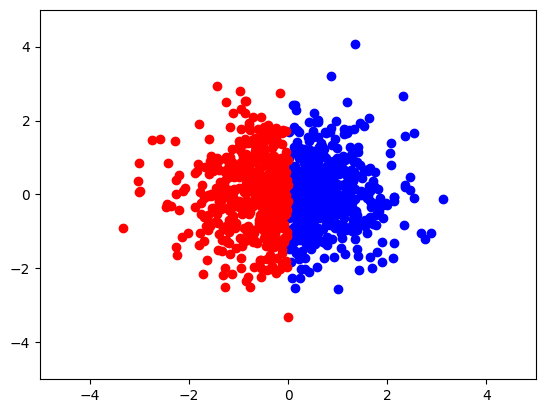

In [50]:
#!pip install seaborn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

list_points_xy = [[np.random.normal(), np.random.normal()] for x in range(0, 1000)]
x, y = zip(*list_points_xy)

x_activated = [x for x in list_points_xy if x[0] >= 0]
x_not_activated = [x for x in list_points_xy if x[0] < 0]

plt.axis([-5, 5, -5, 5])
plt.scatter(*zip(*x_activated), color = 'blue')
plt.scatter(*zip(*x_not_activated), color = 'red')


#### Entropia relativa

Dada a função chamada de *sigmoide*, definida por $\sigma(X) = \frac{1}{e^{-X}+1}$, retiramos as identidades:

* $Q_J(d=1|x) = \sigma({xJ_x+yJ_y+J})$

    que pode ser demonstrado conforme:

    $  \displaystyle \begin{align}
      Q_j(d=1|x) &= \frac{e^{(xJ_x+yJ_y+J)}}{1+e^{xJ_x+yJ_y+J}} \\
      &=  \frac{e^{(xJ_x+yJ_y+J)d}}{1+e^{xJ_x+yJ_y+J}}\cdot \frac{e^{-(xJ_x+yJ_y+J)}}{e^{-(xJ_x+yJ_y+J)}} \\
      &= \frac{1}{e^{-(xJ_x+yJ_y+J)}+1}\\
      &= \sigma(xJ_x+yJ_y+J)\\
      &
      \end{align}$

* $Q_j(d=0|x) = 1-\sigma({xJ_x+yJ_y+J})$

    com a demonstração:

    $  \begin{align}
    1-\sigma({xJ_x+yJ_y+J}) &= 1-\frac{1}{e^{-(xJ_x+yJ_y+J)}+1} \\
    &= \frac{e^{-(xJ_x+yJ_y+J)}+1-1}{e^{-(xJ_x+yJ_y+J)}+1}\\
    &= \frac{e^{-(xJ_x+yJ_y+J)}}{e^{-(xJ_x+yJ_y+J)}+1}\cdot \frac{e^{(xJ_x+yJ_y+J)}}{e^{(xJ_x+yJ_y+J)}} \\
    &= \frac{1}{e^{(xJ_x+yJ_y+J)}+1}=Q_J(d=0|x)
      \end{align} $


Com isso, se pode calcular a entropia relativa para esse modelo, conforme a fórmula introduzida no capítulo anterior:

$ \displaystyle D_{KL} = \sum_{x,d}P(x,d)\log{\frac{P(x,d)}{Q_J(x,d)}}=\sum_{x,d}P(x,d)\log{\frac{P(d|x)P(x)}{Q_J(d|x)P(x)}}=\sum_{x,d}P(x,d)\log{\frac{P(d|x)}{Q_J(d|x)}}$

onde, utilizando as propriedades do logaritmo, obtemos a expressão:
$= \sum_{x,d}(P(x,d)\log{P(d|x)} - P(x,d)\log{Q_J(d|x)})$.

Podemos observar que somente a primeira parte depende de $J$, e decidimos ignorar o segundo termo por hora, visto que, quando aplicamos o gradiente para calcular o erro posteriormente, o termo sem dependência em $J$ desaparece. 

Assim, podemos aproximar o primeiro termo utilizando a lei dos grandes números (fazendo a mesma observação do capítulo anterior, que considera o somatório como um valor esperado) e aproximando o valor esperado pela média das variáveis aleatórias, isto é:

$\displaystyle \sum_{x,d} -P(x,d)\log{Q_J(d|x)} \approx \sum_i ^ N \frac{1}{N} \log{Q_J(d_i|x_i)}=-\left[ d_i \log{\sigma(x_i J_x + y_i J_y + J)} +(1-d_i)\log{1-\sigma(x_i J_x + y_i J_y + J)}\right]$.

#### Valor esperado de classificação

O cálculo feito a seguir no livro tem como objetivo calcular o valor esperado de uma label considerando uma entrada específica. Isto é, relembrando as definições inicias, queremos descobrir, dado um ponto $x_i$ do *dataset*, qual é o valor esperado com o qual este ponto será classificado. Assim, se faz:

$\displaystyle < d >_{J,x_i} = \sum_{labels} d \ Q_J(d|x_i) = 0 \cdot \ Q_J(0|x_i) + 1 \cdot Q_J(1|x_i) = \sigma(x_i J_x + y_i J_y + J)$

Isto é, calculamos a média das _labels_ somando a probabilidade de cada label multiplicada pelo valor da mesma, verificando que a média segue uma sigmoide. Como esse é o valor esperado da classificação, chama-se de _output_ da máquina.

#### Cross entropy

Os autores então introduzem o conceito de _cross entropy_, dado por $L(x,d) = -(d \log(x) + (1-d)\log(1-x))$ para este modelo. Se olharmos com cuidado, a cross entropy é somente uma função que representa a parte interior da aproximação feita para a divergência de Kullback-Leibler, onde $x$ é a função $ \sigma(x_i J_x + y_i J_y + J)$. De fato, a notação que se utiliza no livro $L(<d>_{J, x_i}, d_i)$ nada mais é do que calcular $L(\sigma(x_i J_x + y_i J_y + J), d_i)$, dado o valor esperado das labels que calculamos acima.

A escrita nessa parte é um pouco confusa, mas o conceito principal é que nós __calculamos__ a cross entropy para cada tripla $\{J, J_x, J_y\}$, e minimizamos a entropia relativa $D_{KL}$. O que o autor diz no livro é que minimizar a entropia relativa é equivalente a minimizar _cada termo_ da soma, ou seja, minimizar a cross entropy para cada entrada.

#### Rede com 4 classificações

Na parte seguinte, os autores introduzem um sistema com 4 classificações distintas ao invés de duas. Os cálculos são essencialmente os mesmos, porém com a introdução de uma matriz $\mathbb{J}$ que representa os $J_i$'s (que eram somente $J_x$ e $J_y$ anteriormente) e um vetor $\textbf{J}$. Assim, com um vetor de labels e o vetor de entrada, temos a equação $-\textbf{d} \cdot (\mathbb{J}\textbf{x} + \textbf{J})$. Escrevendo explicitamente cada termo, podemos representar (escolhi representar os termos da matriz com índice superscrito, pois acho que fica mais claro assim):

$\textbf{x} = \begin{bmatrix}
    x \\
    y
\end{bmatrix}, 
\textbf{J} = \begin{bmatrix}
    J_1 \\
    J_2 \\
    J_3 \\
    J_4
    \end{bmatrix},
\mathbb{J} = \begin{bmatrix}
    J_{x}^1 & J_{y}^1 \\
    J_{x}^2 & J_{y}^2 \\
    J_{x}^3 & J_{y}^3 \\
    J_{x}^4 & J_{y}^4
    \end{bmatrix},
\textbf{d} = \begin{bmatrix}
    d_1 \\
    d_2 \\
    d_3 \\
    d_4
    \end{bmatrix}
    $
    
o que nos leva, escrevendo o vetor __d__ como um vetor linha ($\textbf{d}^T$) para explicitar o produto escalar, a:
$\begin{bmatrix}
    d_1 & d_2 & d_3 & d_4
    \end{bmatrix} \left(\begin{bmatrix}
    J_{x}^1 & J_{y}^1 \\
    J_{x}^2 & J_{y}^2 \\
    J_{x}^3 & J_{y}^3 \\
    J_{x}^4 & J_{y}^4
    \end{bmatrix}\begin{bmatrix}
    x \\
    y
\end{bmatrix} +  \begin{bmatrix}
    J_1 \\
    J_2 \\
    J_3 \\
    J_4
    \end{bmatrix}\right)$
    
Isto é, realizamos uma multiplicação de uma matriz por um vetor primeiro ($\mathbb{J}\textbf{x}$), resultando em um vetor de 4 dimensões, seguida da soma por um vetor de mesmo tamanho ($\mathbb{J}\textbf{x}+\textbf{J}$), e por fim realizamos um produto escalar entre o resultado das últimas operações e o vetor de labels ($\textbf{d}\cdot(\mathbb{J}\textbf{x}+\textbf{J})$).

As próximas contas são análogas às feitas anteriormente, mas dessa vez com 4 termos para se considerar. É interessante notar o surgimento da função __softmax__, dada por $\sigma_I (X) = \frac{e^{X_I}}{\sum_J e^{X_J}}$, que é uma extensão da sigmoide. Isso acontece devido ao denominador conter a função de partição Z, que dessa vez possui $n$ termos ao invés de 2, também mão usando mais o 0 como estado, pois nesse caso não estaria contando ele e não compensaria no outro como no caso biário.

#### Rede com classificações infinitas

Consideramos agora um dataset em que se estabelece $d \in (-\infty, \infty)$, isto é, com as labels variando na reta. Nesse caso, os autores consideram outro hamiltoniano, $H_{J,x}(d) = \frac{1}{2}\left(d-(\mathbb{J}x+J)\right)^2$, dado com o intuito de aparecer uma distribuição gaussiana posteriormente. Aqui é importante notar duas coisas:

* A escolha dos hamiltonianos é essencialmente arbitrária, assim como a distribuição de 'chute' $Q_J$; a escolha inicial foi motivada pelas constantes de acoplamento, mas a expressão tomar forma com produtos escalares pelas labels feita anteriormente já não aparece aqui. Nesse caso, a label é subtraída das outras quantidades visando uma expressão mais fácil de lidar quando utilizarmos a gaussiana. Teoricamente, qualquer função bem comportada o suficiente (segundo Vapnik, 1998, ela precisa ser absolutamente contínua) que dependa dos parâmetros J pode ser utilizada. A questão é selecionar bem a função para que o tempo de treinamento não seja muito longo ou até maior que a expectativa de vida do universo, e acredito que ninguém lendo essas notas tem tempo pra isso. 
* Note que o $\mathbb{J}$ é necessariamente uma matriz $1 \times 2$, do tipo $\begin{bmatrix} J_x & J_y \end{bmatrix}$, isto é, um vetor linha, pois o produto matricial precisa ser um número real para ser somado com J e d. Aqui podemos considerar a motivação por essa escolha, visto que anteriormente aumentamos o número de dimensões de d e J para abranger mais classificações. O que motiva essa escolha, a princípio, é a capacidade de um número real de representar essas infinitas classificações na variável de label d, o que também justifica $(\mathbb{J}x+J)$ ser um número real.

Assim, podemos expressar a função de chute como:

$\displaystyle Q_J(d|x) = \frac{e^{\frac{-1}{2}\left(d-a\right)^2}}{Z} = \frac{e^{\frac{-1}{2}\left(d-a\right)^2}}{\int_{-\infty} ^\infty e^{\frac{-1}{2}\left(x-a\right)^2} dx}$,

onde $a = \mathbb{J}x+J$ e a variável $d$ no denominador foi substituída por x por conveniência. O importante é notar que a integral do denominador é uma gaussiana comum, somente _shiftada_ $a$ unidades para a direita.

A gaussiana possui integral conhecida e bem definida; quando integramos em toda a reta (de $-\infty$ a $\infty$), a integral é igual a $\sqrt{2\pi}$. De fato, se fizermos uma substituição $x-a=u$, com $\frac{du}{dx} = 1$, temos que o denominador se torna:

$\displaystyle Z = \int_{-\infty} ^\infty e^{\frac{-1}{2}\left(u\right)^2} du = \sqrt{2\pi} \Rightarrow Q_J(d|x) = \frac{e^{\frac{-1}{2}\left(d-a\right)^2}}{\sqrt{2\pi}} $.

O valor esperado das labels vem naturalmente, considerando que a gaussiana, para cada ponto de dados $x_i$, é centrada em $x_i=(\mathbb{J}x_i+J)$, e portanto $<d>_{J, x_i} = (\mathbb{J}x+J)$. A função de erro $L(<d>_{J,x_i}, d_i)$ é, considerando a definição anterior, o termo interior da entropia relativa (um logaritmo de $Q_J$):

$\displaystyle L(<d>_{J,x_i}, d_i)= -\log(e^{\frac{-1}{2}(d-(\mathbb{J}x+J))^2}) = -\frac{-1}{2}(d-(\mathbb{J}x+J))^2 = \frac{1}{2}(d-(<d>_{J,x_i}))^2$,

o que o autor nota se tratar do erro quadrático médio, concluindo então, finalmente, que acabamos de "fazer" uma regressão linear por meio de uma rede neural simples. Isso faz sentido quando consideramos o que significa tomar as labels como um valor real. Fazendo isso, é como se nós "classificássemos pontualmente" cada ponto de input, obtendo uma classificação na reta como output.

#### Regressão com graus de liberdade adicionais 

Nessa parte, se introduz um modelo para labels com __d__ indo de $0$ a $\infty$. Esse modelo se utiliza dos resultados para a ReLu (Rectified Linear unit), introduzida dessa forma no trabalho seminal de V. Nair, 2010, que utiliza o conceito de *binomial units* de Teh & Hinton, 2001, permitindo expressar cada unidade com mais informação. Isso se dá por meio da ideia de utilizar os mesmos pesos e bias' mas com 'infinitas' (*N* grande) cópias distintas. No livro, essa ideia é feita com o hamiltoniano:

$ \displaystyle H_{J,x}(\{ h_{bit}^{(u)}\}_{u\in I \subset \mathbb{N}}=-\sum_{u=1}^N(\mathbb{J}\textbf{x}+J+0.5-u)h_{bit}^{(u)}$

que é exatamente igual ao hamiltoniano da primeira classificação que fizemos, mas com um *offset* no bias de $(0.5-u)$. Isto é, o bias é alterado pela soma de $0.5-u$ unidades $(-0.5, -1.5, -2.5, ...)$, o que dá mais liberdade ao sistema. 

Também podemos perceber que o termo que seria o label __d__ aparece como $h_{bit}^u$. Assim se explicita o aparecimento uma camada que não necessariamente é uma label (que mais tarde se diz ser uma hidden layer). Podemos escrever a distribuição de chute como:

$\displaystyle Q_J(\{h_{bit}^u\}|\textbf{x}) = \prod_{u=1}^N  \begin{bmatrix} \sigma(\mathbb{J}\textbf{x}+0.5-u), \ \ \text{se } h_{bit}^ u = 1 \\ 1-\sigma(\mathbb{J}\textbf{x}+0.5-u), \ \ \text{se } h_{bit}^ u = 0 \end{bmatrix}$

E, dado

$ \displaystyle h = \sum_{u=1}^N h_{bits}^u$,

e a função de erro dada pelo hamiltoniano auxiliar $H_h(d) = \frac{1}{2} (d-h)^2$

$\displaystyle Q(d|h) = \frac{e^{-\frac{1}{2}(d-h)^2}}{\sqrt{2\pi}}$,

podemos definir a probabilidade condicional:

$ \displaystyle Q_J(d|\textbf{x}) = Q(d|h)Q_J(\{h_{bit}^u|\textbf{x}\}) = Q\left(d|h = \sum_{u=1}^N h_{bits}^u \right)Q_J(\{h_{bit}^u\}|\textbf{x})$

##### aqui está faltando elaborar, é bem complicado de entender

No livro, se calcula a função erro com as mesmas aproximações anteriores usando a lei dos grandes números. A parte importante de se considerar é que $<h>_{J,x_i} \approx \sigma_{ReLu} (\mathbb{J}\textbf{x_i}+J)$ e que $Q(d_i|h=<h>_{J,x_i}) \approx \sum_{\{h_{bit}^u\}} Q(d_i|h = \sum^N h_{bits}) Q_J(\{h_{bit}^u\}|x_i)$. Isto é, a saída dos neurônios de entrada é dada pela *função de ativação* ReLu, que é dada pelo valor esperado de $h$. Isso nos permitirá extrapolar o conceito para a próxima seção.

### Subseção 3.1.2
Consideramos agora uma rede neural profunda (*deep neural network*). Sabendo que a saída dos neurônios de entrada é $<h>_{J,x_i}$, que é uma ReLu, podemos considerar um vetor $\vec{h_i}$ para cada hidden layer adicional. Por exemplo, uma camada com três neurônios que recebe *n* entradas do dataset possui uma saída dada por:

$<\vec{h_i}>_{J,x_i}= \ <\begin{bmatrix} 
    {h_{i}^{1}} & {h_{i}^{2}}  & {h_{i}^{3}}
\end{bmatrix}>_{J,\textbf{x}} $

Assim, para cada camada teremos um hamiltoniano, i.e., uma lista de hamiltonianos $({H_{J_1, \textbf{x}}^1}(\textbf{h}_1), {H_{J_2, \textbf{h}_1}^2}(\textbf{h}_2), ..., {H_{J_N, \textbf{h}_{N-1}}^N}(\textbf{d}))$. Portanto, a probabilidade $Q_J(d|x)$ de chute, que é baseada nos hamiltonianos, será uma composição de todas as probabilidades individuais relativas aos $Q_{J_i}$'s. 

No texto, o modelo utilizado é somente imposto, sem maiores explicações. Tentarei justificar a escolha de maneira intuitiva. O modelo em questão é dado por:

$Q_J(\textbf{d}|\textbf{x}) = \sum_{\textbf{h}_1,...,\textbf{h}_{N-1}}Q_{J_N}(\textbf{d}|\textbf{h}_{N-1})...Q_{J_2}(\textbf{h}_2|\textbf{h}_{1})Q_{J_1}(\textbf{h}_1|\textbf{x})$

O termo interior da soma é dado por probabilidades condicionais. Isto é, o último termo do produto ${Q_J}_{1}(\textbf{h}_1|\textbf{x})$ é a probabilidade de se obter a saída $\textbf{h_1}$ na primeira camada dado um ponto $\textbf{x}$ na entrada; o segundo termo $Q_{J_2}(\textbf{h}_2|\textbf{h}_{1})$ nos diz a probabilidade de se obter um valor $\textbf{h}_2$ na segunda camada, dado que obtivemos uma saída $\textbf{h}_{1}$ na primeira hidden layer, e assim sucessivamente. 

Faz sentido, portanto, considerar a probabilidade inicial $Q_J(\textbf{d}|\textbf{x})$ (probabilidade de se obter uma label de saída da rede $\textbf{d}$ dado um ponto inicial $\textbf{x}$) como o a probabilidade de se obter uma certa saída dada a primeira entrada vezes uma certa saída dada a segunda entrada, ..., ou seja, como um produto de probabilidades de cada passo da rede. 

O somatório aparece para contabilizar todos os possíveis valores dos vetores $\textbf{h}_i$, de forma a cobrir todas as possibilidades que levam um ponto inicial $\textbf{x}$ a um label $\textbf{d}$.

O conceito que apresentamos acima é escancarado pela aproximação feita no texto, substituindo o somatório somente por um valor esperado:

$Q_J(\textbf{d}|\textbf{x}) \approx {Q_J}_N(\textbf{d}|<\textbf{h}_{N-1}>)$

que é uma aproximação pelo fato de tomarmos uma média do que esperamos como saída na última hidden layer, ao invés de considerar cada termo. A aproximação é boa, entretando, porque o valor médio dessa última camada depende de todos as outras camadas. De fato, utilizando a equação obtida anteriormente para o valor esperado $<h>_{J,x_i} \approx \sigma_{ReLu} (\mathbb{J}\textbf{x_i}+J)$, podemos escrever

$<\textbf{h}_{N-1}> = \sigma_{ReLu}^{N-1}(\mathbb{J}_{N-1}<\textbf{h}_{N-2}>+\textbf{J}_{N-1}), ..., \sigma_{ReLu}^{1}(\mathbb{J}_{1}<\textbf{x}>+\textbf{J}_{1}),$

o que é muito interessante e simplifica muito o problema, se tornando somente uma questão de calcular de forma recorrente os valores esperados para cada hidden layer. 

O livro faz, então, outra observação interessante. A estrutura que vemos na equação acima explicita o processo de aprendizado, que é composto dos passos iterativos: fazer uma transformação linear $(\mathbb{J}_{i}<\textbf{h}_{i-1}>+\textbf{J}_{i})$, seguida de uma transformação não linear pela função de ativação que, nesse caso, é uma ReLu. Isso torna o aprendizado possível, pois somente uma transformação linear em cada neurônio não é o suficiente para o processo de aprendizado captar características complexas do conjunto de dados em análise; utilizar uma versão sem não-linearização seria o equivalente a fazer uma regressão linear simples.